In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.formula.api as smf

In [ ]:
import random
y = np.random.random_integers(1, 20, 50)
x1 = np.random.random_integers(5, 20, 50)
x2 = np.random.normal(30, 10, 50).round(1)
x3 = np.random.normal(50, 10, 50).round(2)
lst = ['A', 'B', 'C', 'D']
x4 = random.choices(lst, k=50)

In [ ]:
data = {'Y':y, 'X1':x1, 'X2':x2, 'X3':x3, "X4":x4}
df = pd.DataFrame(data)
df.head(3)

,Y,X1,X2,X3,X4
0,12,19,44.3,46.04,C
1,3,13,18.1,33.58,A
2,13,15,40.0,67.46,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       50 non-null     int64  
 1   X1      50 non-null     int64  
 2   X2      50 non-null     float64
 3   X3      50 non-null     float64
 4   X4      50 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
df.X3.describe()


count    50.000000
mean     49.835200
std       9.046405
min      32.180000
25%      44.080000
50%      48.375000
75%      56.410000
max      68.920000
Name: X3, dtype: float64

array([[<AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'X1'}>],
       [<AxesSubplot:title={'center':'X2'}>,
        <AxesSubplot:title={'center':'X3'}>]], dtype=object)

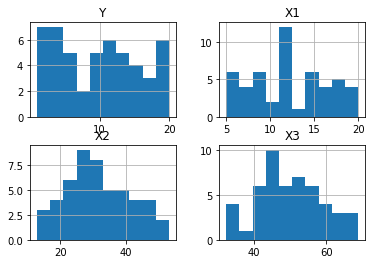

In [ ]:
df.hist()

<AxesSubplot:ylabel='Density'>

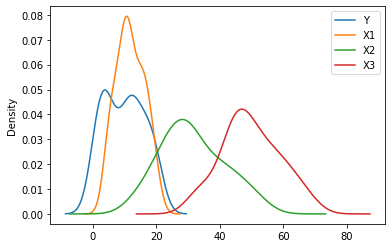

In [ ]:
df.plot.kde()


Из полученных диаграмм видно, что выборочные значения переменных
соответствуют нормальному закону. Однако этот факт нужно проверить с
помощью критериев.

In [ ]:
import scipy
stat, p = scipy.stats.shapiro(df['X3']) #тест Шапиро-Уилка для X3
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

Statistics=0.981, p-value=0.590


In [ ]:
stat, p = scipy.stats.normaltest(df['X3']) # критерий согласия Пирсона
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

Statistics=0.547, p-value=0.761


Зная, что гипотезу нормальности можно принять, при значении критерия > 0.05, получаем, что распределение Х3 соответсвует нормальному

In [ ]:
df.corr()

,Y,X1,X2,X3
Y,1.000000,0.178129,-0.038650,0.360317
X1,0.178129,1.000000,0.126616,-0.145688
X2,-0.038650,0.126616,1.000000,0.060941
X3,0.360317,-0.145688,0.060941,1.000000


Судя по значениям корреляций, в данной выборке не наблюдаются
тесные линейные связи переменных. В этом случае можно сделать вывод о
независимости переменных.

<AxesSubplot:xlabel='Y', ylabel='count'>

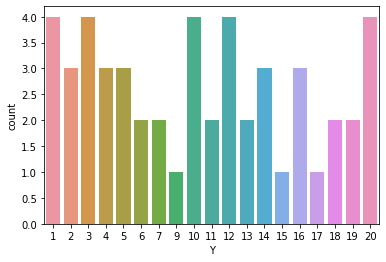

In [ ]:
sns.countplot(x='Y', data=df)


<AxesSubplot:xlabel='X4', ylabel='count'>

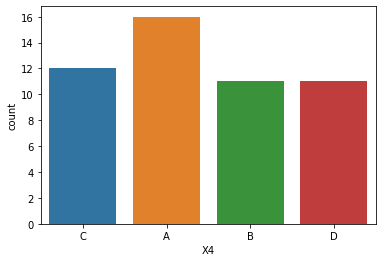

In [ ]:
sns.countplot(x='X4', data=df)